# Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Read and Adjust data

In [6]:
# read data and describe it
data = pd.read_csv("data/magic04.data", header=None)
data.describe()

,0,1,2,3,4,5,6,7,8,9
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [7]:
x = data.drop(columns=10)
y = data[10]

In [8]:
# check the count of every class
y.value_counts()

10
g    12332
h     6688
Name: count, dtype: int64

In [9]:
resampler = RandomUnderSampler(random_state=42)
x, y = resampler.fit_resample(x, y)

In [10]:
y.value_counts()

10
g    6688
h    6688
Name: count, dtype: int64

In [11]:
# turn to np arrays and normalize y
x = np.array(x)
y = np.array([1 if c == "g" else 0 for c in y])


In [12]:
# function to plot each feature with the target to visualize each feature range and effect
# y2 optional parameter to plot predections as well as target if desired
def plot_features(x, y, y2=None, n_features=2):
    fig, ax = plt.subplots(1, n_features, sharey=True)

    for i in range(len(ax)):
        ax[i].scatter(x[:, i], y)

    if y2 is not None:
        for i in range(len(ax)):
            ax[i].scatter(x[:, i], y2, color='red', facecolors="none")


    fig.set_figwidth(20)
    fig.set_figheight(7)

    ax[0].set_ylabel("price")

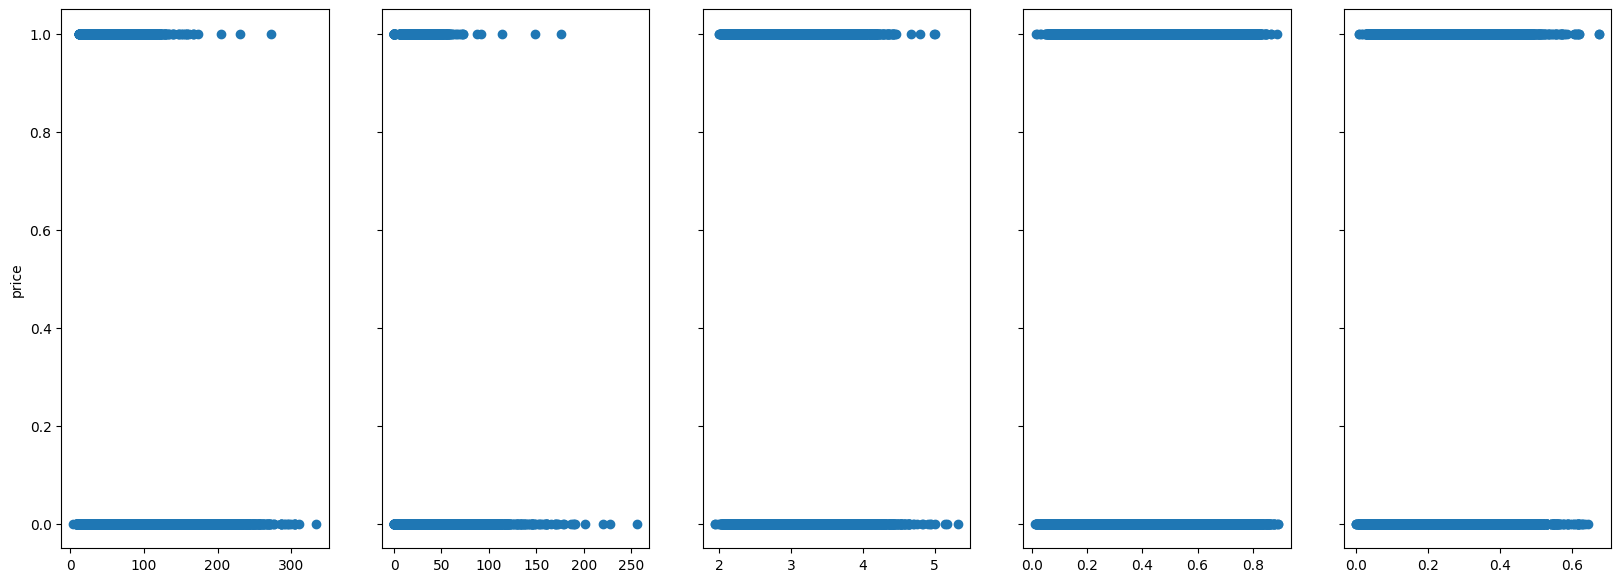

In [13]:
# ploting features before normalization
plot_features(x, y, n_features=5)

In [14]:
# normalize data
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [15]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9
count,13376.000000,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04,13376.000000,13376.000000,13376.000000,13376.000000,1.337600e+04
mean,0.000000,1.699863e-17,-1.138908e-15,2.974760e-17,1.338642e-16,0.000000,0.000000,0.000000,0.000000,4.249658e-18
std,1.000037,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037,1.000037,1.000037,1.000037,1.000037e+00
min,-1.127508,-1.133850e+00,-1.892575e+00,-1.985823e+00,-1.913371e+00,-6.881124,-6.013030,-8.884994,-1.165906,-2.540439e+00
25%,-0.695597,-5.725646e-01,-7.321727e-01,-7.894450e-01,-7.817974e-01,-0.257698,-0.397603,-0.484783,-0.895471,-6.885832e-01
50%,-0.396412,-3.134357e-01,-1.855942e-01,-1.267208e-01,-1.521529e-01,0.158529,0.126236,-0.010683,-0.295185,-2.493378e-02
75%,0.403141,1.177649e-01,5.797416e-01,6.862462e-01,6.507554e-01,0.478232,0.491079,0.465791,0.782802,6.290579e-01
max,5.887093,1.113860e+01,5.214415e+00,2.791003e+00,4.114246e+00,8.909961,4.091646,7.741114,2.170920,3.932278e+00


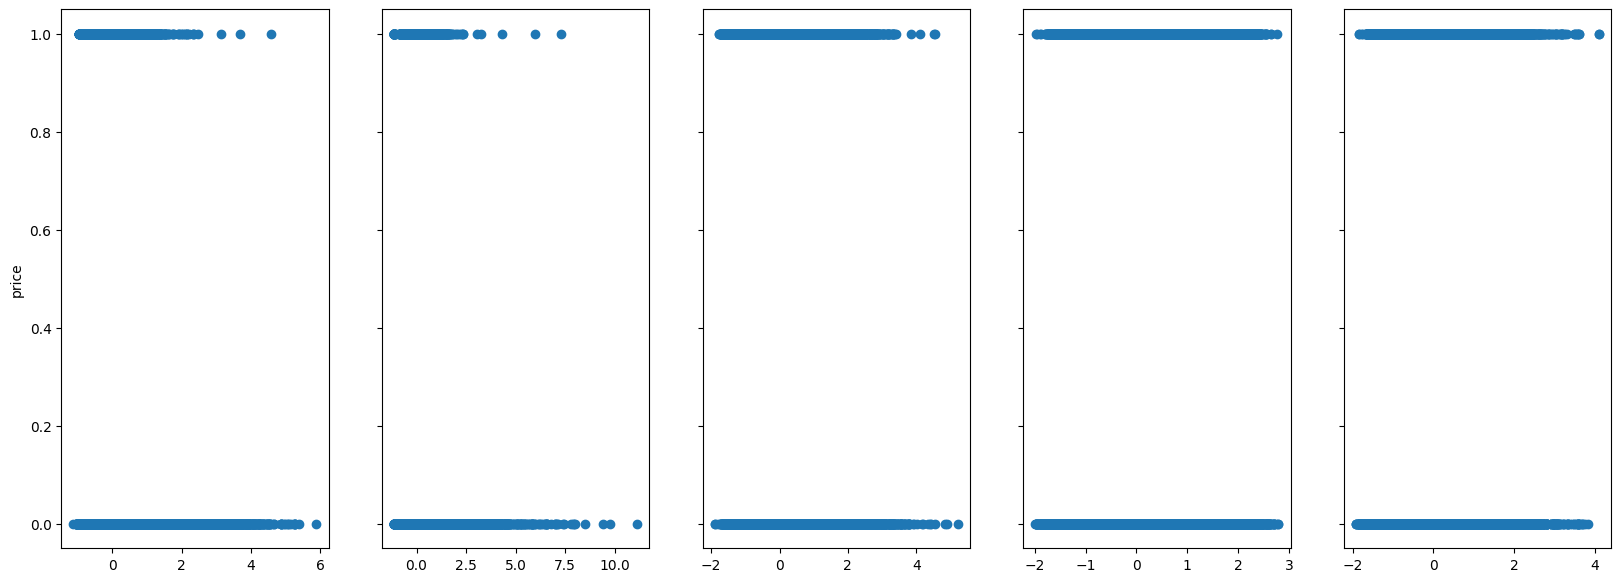

In [16]:
# ploting features after normalization
plot_features(x, y, n_features=5)

In [17]:
x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.7, random_state=0)

# Train and Assess Logestic Regression model

In [18]:
model = LogReg()

params = {
    "penalty": [None, "l2"],
    "C": [0.01, 0.1, 1, 10, 50, 100]
}

lg_cv = GridSearchCV(model, param_grid=params, cv=10, scoring=["accuracy", "f1", "recall", "precision"], refit="accuracy")

In [19]:
lg_cv.fit(x_train, y_train)

C:\Users\mohdn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\mohdn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\mohdn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\mohdn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1192: UserW

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100],
                         'penalty': [None, 'l2']},
             refit='accuracy',
             scoring=['accuracy', 'f1', 'recall', 'precision'])

In [20]:
result = pd.DataFrame(lg_cv.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split3_test_precision,split4_test_precision,split5_test_precision,split6_test_precision,split7_test_precision,split8_test_precision,split9_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,0.019265,0.003948,0.007997,0.000004,0.01,None,"{'C': 0.01, 'penalty': None}",0.781095,0.736318,0.750623,...,0.760000,0.747826,0.753304,0.756757,0.754386,0.728507,0.766355,0.746933,0.016989,1
1,0.012175,0.003963,0.008118,0.001271,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.778607,0.738806,0.745636,...,0.768889,0.747863,0.748936,0.728070,0.757447,0.721239,0.751131,0.741119,0.018233,12
2,0.015883,0.003381,0.008218,0.000443,0.1,None,"{'C': 0.1, 'penalty': None}",0.781095,0.736318,0.750623,...,0.760000,0.747826,0.753304,0.756757,0.754386,0.728507,0.766355,0.746933,0.016989,1
3,0.016653,0.004076,0.007381,0.001855,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.783582,0.733831,0.743142,...,0.760000,0.746725,0.755556,0.752252,0.756522,0.729730,0.754630,0.744604,0.017583,11
4,0.016344,0.004765,0.010281,0.003608,1,None,"{'C': 1, 'penalty': None}",0.781095,0.736318,0.750623,...,0.760000,0.747826,0.753304,0.756757,0.754386,0.728507,0.766355,0.746933,0.016989,1
5,0.015989,0.003575,0.007999,0.000010,1,l2,"{'C': 1, 'penalty': 'l2'}",0.781095,0.736318,0.750623,...,0.760000,0.746725,0.756637,0.756757,0.755459,0.728507,0.762791,0.746907,0.016824,8
6,0.015190,0.002428,0.008118,0.000363,10,None,"{'C': 10, 'penalty': None}",0.781095,0.736318,0.750623,...,0.760000,0.747826,0.753304,0.756757,0.754386,0.728507,0.766355,0.746933,0.016989,1
7,0.017445,0.003300,0.008965,0.002391,10,l2,"{'C': 10, 'penalty': 'l2'}",0.781095,0.736318,0.750623,...,0.760000,0.747826,0.753304,0.756757,0.754386,0.728507,0.762791,0.746576,0.016611,9
8,0.016690,0.002104,0.009857,0.003110,50,None,"{'C': 50, 'penalty': None}",0.781095,0.736318,0.750623,...,0.760000,0.747826,0.753304,0.756757,0.754386,0.728507,0.766355,0.746933,0.016989,1
9,0.015921,0.003590,0.009595,0.003198,50,l2,"{'C': 50, 'penalty': 'l2'}",0.781095,0.736318,0.750623,...,0.760000,0.747826,0.753304,0.756757,0.754386,0.728507,0.762791,0.746576,0.016611,9


In [21]:
selected_results = result[["param_penalty", "param_C", "mean_test_accuracy", "mean_test_precision", "mean_test_f1", "mean_test_recall"]]
selected_results

,param_penalty,param_C,mean_test_accuracy,mean_test_precision,mean_test_f1,mean_test_recall
0,None,0.01,0.766704,0.746933,0.782447,0.821753
1,l2,0.01,0.765956,0.741119,0.784055,0.832494
2,None,0.1,0.766704,0.746933,0.782447,0.821753
3,l2,0.1,0.764958,0.744604,0.781175,0.821753
4,None,1,0.766704,0.746933,0.782447,0.821753
5,l2,1,0.766704,0.746907,0.782443,0.821753
6,None,10,0.766704,0.746933,0.782447,0.821753
7,l2,10,0.766455,0.746576,0.782260,0.821753
8,None,50,0.766704,0.746933,0.782447,0.821753
9,l2,50,0.766455,0.746576,0.782260,0.821753


In [22]:
lg_cv.best_params_

{'C': 0.01, 'penalty': None}

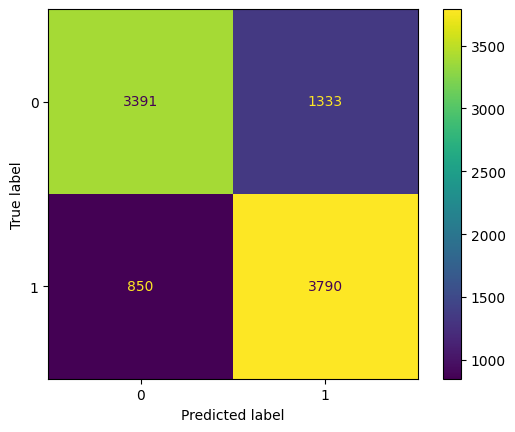

In [23]:
lg_prediction = lg_cv.best_estimator_.predict(x_eval)
m = confusion_matrix(y_eval, lg_prediction)
cm = ConfusionMatrixDisplay(m)
cm.plot()

In [24]:
print(classification_report(y_eval, lg_prediction))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      4724
           1       0.74      0.82      0.78      4640

    accuracy                           0.77      9364
   macro avg       0.77      0.77      0.77      9364
weighted avg       0.77      0.77      0.77      9364



# Train and Assess KNN model

In [25]:
knn_model = KNN()

params = {
    "n_neighbors": list(range(3,20,2))
}

knn_cv = GridSearchCV(knn_model, param_grid=params, cv=10, return_train_score=True, scoring=["accuracy", "f1", "recall", "precision"], refit="accuracy")

In [26]:
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             refit='accuracy', return_train_score=True,
             scoring=['accuracy', 'f1', 'recall', 'precision'])

In [27]:
knn_result = pd.DataFrame(knn_cv.cv_results_)
knn_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,split2_train_precision,split3_train_precision,split4_train_precision,split5_train_precision,split6_train_precision,split7_train_precision,split8_train_precision,split9_train_precision,mean_train_precision,std_train_precision
0,0.004705,0.003853,0.052396,0.005251,3,{'n_neighbors': 3},0.766169,0.771144,0.778055,0.783042,...,0.847728,0.846883,0.850882,0.848057,0.852764,0.848896,0.849000,0.847305,0.848029,0.002510
1,0.004734,0.003572,0.049915,0.005031,5,{'n_neighbors': 5},0.756219,0.778607,0.795511,0.800499,...,0.813250,0.812860,0.814032,0.816287,0.817437,0.812651,0.814354,0.813372,0.814814,0.002256
2,0.003565,0.003652,0.054108,0.003356,7,{'n_neighbors': 7},0.761194,0.788557,0.773067,0.820449,...,0.798677,0.797361,0.798954,0.799241,0.801633,0.797252,0.798200,0.796682,0.798441,0.001431
3,0.004357,0.004402,0.052539,0.003775,9,{'n_neighbors': 9},0.736318,0.783582,0.773067,0.820449,...,0.792860,0.786816,0.789499,0.794774,0.796853,0.788462,0.788489,0.793283,0.791520,0.003081
4,0.007208,0.002403,0.053972,0.003429,11,{'n_neighbors': 11},0.746269,0.788557,0.778055,0.815461,...,0.790170,0.778757,0.785647,0.785714,0.786084,0.783380,0.781860,0.782690,0.784184,0.002985
5,0.004001,0.004001,0.055730,0.001809,13,{'n_neighbors': 13},0.763682,0.766169,0.773067,0.830424,...,0.778608,0.777674,0.777933,0.776586,0.777106,0.775000,0.774298,0.774896,0.776992,0.001711
6,0.005589,0.003659,0.057865,0.006391,15,{'n_neighbors': 15},0.758706,0.756219,0.760599,0.822943,...,0.774825,0.769621,0.771840,0.775339,0.777159,0.771889,0.773167,0.769725,0.773087,0.002603
7,0.003900,0.003703,0.055612,0.002750,17,{'n_neighbors': 17},0.758706,0.763682,0.758105,0.815461,...,0.771613,0.765138,0.768626,0.767667,0.766484,0.768489,0.765704,0.765811,0.767775,0.001911
8,0.005240,0.003512,0.058231,0.002615,19,{'n_neighbors': 19},0.756219,0.768657,0.755611,0.820449,...,0.770339,0.760860,0.767130,0.766125,0.764814,0.765057,0.761009,0.763819,0.764938,0.002643


In [28]:
knn_selected_results = knn_result[["param_n_neighbors", "mean_test_accuracy", "mean_test_precision", "mean_test_f1", "mean_test_recall"]]
knn_selected_results

,param_n_neighbors,mean_test_accuracy,mean_test_precision,mean_test_f1,mean_test_recall
0,3,0.784903,0.756361,0.801831,0.853520
1,5,0.790640,0.757339,0.808949,0.868639
2,7,0.793628,0.757284,0.812618,0.876949
3,9,0.789397,0.751239,0.809685,0.878415
4,11,0.793133,0.752032,0.814149,0.887695
5,13,0.792636,0.750942,0.814118,0.889163
6,15,0.785408,0.743728,0.808024,0.884778
7,17,0.785406,0.742407,0.808611,0.888207
8,19,0.786652,0.746094,0.808588,0.882817


In [29]:
knn_cv.best_params_

{'n_neighbors': 7}

In [30]:
knn_prediction = knn_cv.best_estimator_.predict(x_eval)

print(classification_report(y_eval, knn_prediction))

              precision    recall  f1-score   support

           0       0.86      0.72      0.79      4724
           1       0.76      0.88      0.82      4640

    accuracy                           0.80      9364
   macro avg       0.81      0.80      0.80      9364
weighted avg       0.81      0.80      0.80      9364



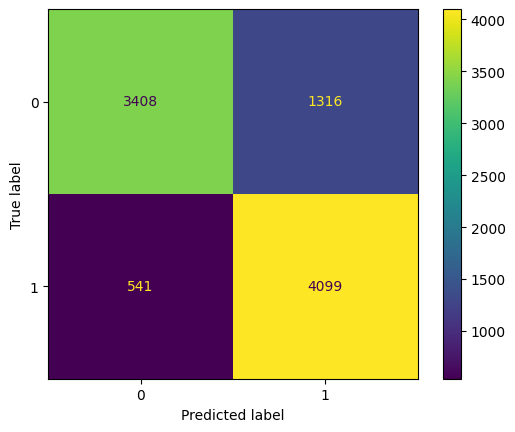

In [31]:
m = confusion_matrix(y_eval, knn_prediction)
p = ConfusionMatrixDisplay(m)
p.plot()